In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import json
from collections import OrderedDict
from PIL import Image, ImageDraw
from copy import deepcopy
import shutil
import random
import warnings
warnings.filterwarnings('ignore')

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### Varify the accuracy of the annotation

In [2]:
annotation_82_1 = json.load(open("annotation_images/tv_82_23kps.json"))
annotation_82_2 = json.load(open("annotation_images/test_82_230816.json"))
annotation_93_1 = json.load(open("annotation_images/tv_93_23kps.json"))
annotation_93_2 = json.load(open("annotation_images/test_93_230816.json"))

In [3]:
annotation_82_1_dict = {}

for img in annotation_82_1['images']:
    annotation_82_1_dict[img['id']] = {}
    annotation_82_1_dict[img['id']]['file_name'] = img['file_name']
    for kps in annotation_82_1['annotations']:
        if kps['image_id'] == img['id']:
            annotation_82_1_dict[img['id']]['keypoints'] = np.array(kps['keypoints']).reshape(-1, 3)[:, :-1]

In [4]:
annotation_82_2_dict = {}

for img in annotation_82_2['images']:
    annotation_82_2_dict[img['id']] = {}
    annotation_82_2_dict[img['id']]['file_name'] = img['file_name']
    for kps in annotation_82_2['annotations']:
        if kps['image_id'] == img['id']:
            annotation_82_2_dict[img['id']]['keypoints'] = np.array(kps['keypoints']).reshape(-1, 3)[:, :-1]

In [5]:
annotation_93_1_dict = {}

for img in annotation_93_1['images']:
    annotation_93_1_dict[img['id']] = {}
    annotation_93_1_dict[img['id']]['file_name'] = img['file_name']
    for kps in annotation_93_1['annotations']:
        if kps['image_id'] == img['id']:
            annotation_93_1_dict[img['id']]['keypoints'] = np.array(kps['keypoints']).reshape(-1, 3)[:, :-1]

In [6]:
annotation_93_2_dict = {}

for img in annotation_93_2['images']:
    annotation_93_2_dict[img['id']] = {}
    annotation_93_2_dict[img['id']]['file_name'] = img['file_name']
    for kps in annotation_93_2['annotations']:
        if kps['image_id'] == img['id']:
            annotation_93_2_dict[img['id']]['keypoints'] = np.array(kps['keypoints']).reshape(-1, 3)[:, :-1]

In [7]:
def cal_euclidean_distance(x1, y1, x2, y2):
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

In [8]:
annotation_82_2_dict

{494: {'file_name': '1.2.840.113619.2.110.210419.20180319173427.1.12.12.1.jpg',
  'keypoints': array([[104, 334],
         [169, 332],
         [ 81, 352],
         [194, 350],
         [ 91, 389],
         [182, 388],
         [117, 429],
         [157, 428],
         [137, 418],
         [109, 380],
         [163, 380],
         [135, 359],
         [137, 406],
         [ 77, 401],
         [196, 399],
         [116, 420],
         [156, 418],
         [116, 372],
         [154, 371],
         [ 95, 378],
         [180, 377],
         [100, 411],
         [171, 405]])},
 495: {'file_name': '1.2.840.113619.2.110.210419.20180322141043.1.12.12.1.jpg',
  'keypoints': array([[118, 321],
         [186, 322],
         [ 94, 341],
         [209, 341],
         [111, 372],
         [192, 375],
         [135, 404],
         [171, 406],
         [151, 397],
         [126, 364],
         [177, 364],
         [151, 338],
         [152, 387],
         [100, 376],
         [201, 380],
         [135

In [9]:
hip_regions = ['iliac_crest_left', 'iliac_crest_right', 'iliac_spine_left', 'iliac_spine_right', 'iliopubic_eminence_left', 'iliopubic_eminence_right', 
               'inferior_pubic_ramus_left', 'inferior_pubic_ramus_right', 'pubic_arch', 'sciatic_notch_left', 'sciatic_notch_right', 'sacrum', 
               'pubic_tubercle', 'trochanter_left', 'trochanter_right', 'obturator_left', 'obturator_right', 
               'sacrum_left', 'sacrum_right', 'inferior_iliac_spine_left', 'inferior_iliac_spine_right','acetabular_inferior_left', 'acetabular_inferior_right']
img_names = []
for img in annotation_82_2_dict:
    img_names.append(annotation_82_2_dict[img]['file_name'])

df_82 = pd.DataFrame(columns = hip_regions, index = img_names)


for img in annotation_82_2_dict:
    img_name = annotation_82_2_dict[img]['file_name']
    kps1 = annotation_82_2_dict[img]['keypoints']
    for img2 in annotation_82_1_dict:
        if annotation_82_1_dict[img2]['file_name'] == img_name:
            kps2 = annotation_82_1_dict[img2]['keypoints']
    for i in range(len(hip_regions)):
        df_82.loc[img_name, hip_regions[i]] = cal_euclidean_distance(kps1[i][0], kps1[i][1], kps2[i][0], kps2[i][1])

In [10]:
df_82.shape

(10, 23)

In [11]:
df_82

,iliac_crest_left,iliac_crest_right,iliac_spine_left,iliac_spine_right,iliopubic_eminence_left,iliopubic_eminence_right,inferior_pubic_ramus_left,inferior_pubic_ramus_right,pubic_arch,sciatic_notch_left,...,trochanter_left,trochanter_right,obturator_left,obturator_right,sacrum_left,sacrum_right,inferior_iliac_spine_left,inferior_iliac_spine_right,acetabular_inferior_left,acetabular_inferior_right
1.2.840.113619.2.110.210419.20180319173427.1.12.12.1.jpg,1.0,3.162278,1.0,2.0,2.0,2.236068,5.09902,1.0,0.0,2.236068,...,1.414214,2.236068,1.0,2.236068,1.0,2.0,1.0,2.0,2.0,2.236068
1.2.840.113619.2.110.210419.20180322141043.1.12.12.1.jpg,1.0,1.0,1.0,1.0,2.236068,2.236068,3.0,1.0,1.0,3.0,...,1.0,1.414214,1.0,1.414214,0.0,1.0,1.0,1.414214,3.0,4.0
1.2.840.113619.2.110.210419.20180323183139.1.12.12.1.jpg,4.0,6.0,2.0,0.0,1.0,1.0,2.0,1.414214,1.414214,4.0,...,1.414214,1.414214,1.0,0.0,0.0,5.385165,1.0,1.0,1.414214,1.0
1.2.840.113619.2.110.210419.20180327185012.1.12.12.1.jpg,0.0,2.236068,0.0,0.0,0.0,0.0,0.0,0.0,1.414214,1.0,...,1.414214,1.0,0.0,0.0,2.828427,2.0,1.0,0.0,1.414214,2.0
1.2.840.113619.2.110.210419.20180412085031.1.12.12.1.jpg,1.414214,2.0,0.0,2.0,1.0,2.828427,1.414214,1.0,1.0,1.0,...,1.0,1.0,2.0,1.0,1.0,1.414214,1.0,2.828427,0.0,1.0
1.2.840.113619.2.110.210419.20180423150508.1.12.12.1.jpg,2.0,3.162278,1.0,1.0,1.0,2.236068,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,2.236068,1.0,7.28011,7.071068,0.0,0.0
1.2.840.113619.2.110.210419.20180426194009.1.12.12.1.jpg,1.0,3.0,1.414214,1.0,1.0,0.0,2.0,1.0,1.0,1.0,...,2.828427,1.0,0.0,0.0,1.0,2.0,1.414214,2.0,0.0,2.0
1.2.840.113619.2.110.210419.20180505093954.1.12.12.1.jpg,1.0,3.0,0.0,1.414214,1.414214,1.0,2.0,4.0,1.0,1.414214,...,0.0,0.0,1.0,1.0,3.0,1.414214,1.0,0.0,1.414214,1.0
1.2.840.113619.2.110.210419.20180507154607.1.12.12.1.jpg,1.414214,5.0,1.0,1.414214,1.0,1.0,1.414214,1.414214,1.0,0.0,...,1.414214,1.0,1.414214,0.0,2.236068,2.0,2.236068,1.414214,2.828427,1.0
1.2.840.113619.2.110.210419.20180511105945.1.12.12.1.jpg,1.0,1.414214,0.0,1.0,1.414214,1.0,0.0,4.0,1.0,1.0,...,1.0,2.236068,1.0,0.0,2.828427,4.242641,0.0,1.414214,1.0,3.0


In [12]:
img_names = []
for img in annotation_93_2_dict:
    img_names.append(annotation_93_2_dict[img]['file_name'])

df_93 = pd.DataFrame(columns = hip_regions, index = img_names)


for img in annotation_93_2_dict:
    img_name = annotation_93_2_dict[img]['file_name']
    kps1 = annotation_93_2_dict[img]['keypoints']
    for img2 in annotation_93_1_dict:
        if annotation_93_1_dict[img2]['file_name'] == img_name:
            kps2 = annotation_93_1_dict[img2]['keypoints']
    for i in range(len(hip_regions)):
        df_93.loc[img_name, hip_regions[i]] = cal_euclidean_distance(kps1[i][0], kps1[i][1], kps2[i][0], kps2[i][1])


In [13]:
df_93

,iliac_crest_left,iliac_crest_right,iliac_spine_left,iliac_spine_right,iliopubic_eminence_left,iliopubic_eminence_right,inferior_pubic_ramus_left,inferior_pubic_ramus_right,pubic_arch,sciatic_notch_left,...,trochanter_left,trochanter_right,obturator_left,obturator_right,sacrum_left,sacrum_right,inferior_iliac_spine_left,inferior_iliac_spine_right,acetabular_inferior_left,acetabular_inferior_right
1.2.840.113619.2.110.210419.20150913100316.2.12.12.1.jpg,0.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.414214,...,1.0,1.0,1.414214,1.0,2.236068,1.0,3.0,1.0,0.0,1.0
1.2.840.113619.2.110.210419.20150913101050.2.12.12.1.jpg,0.0,1.0,0.0,1.0,3.162278,2.236068,5.0,2.0,1.0,1.0,...,1.0,0.0,1.0,1.0,2.828427,1.414214,1.0,1.414214,2.236068,2.0
1.2.840.113619.2.110.210419.20150914105227.1.12.12.1.jpg,2.0,2.0,0.0,1.0,0.0,1.0,1.0,2.0,1.414214,1.0,...,2.0,1.0,0.0,1.0,1.0,1.414214,1.0,1.414214,2.236068,1.0
1.2.840.113619.2.110.210419.20150915095947.2.12.12.1.jpg,4.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,2.236068,2.0,1.0,1.414214,0.0,1.414214
1.2.840.113619.2.110.210419.20150915165625.2.12.12.1.jpg,2.0,1.0,1.0,2.0,1.0,1.0,0.0,2.0,1.0,1.414214,...,1.0,1.414214,1.0,0.0,0.0,2.236068,0.0,0.0,1.0,1.414214
1.2.840.113619.2.110.210419.20150916084111.2.12.12.1.jpg,1.0,2.0,1.0,2.0,1.0,1.414214,1.0,0.0,0.0,0.0,...,1.414214,2.0,1.414214,0.0,0.0,3.162278,0.0,0.0,3.0,3.162278
1.2.840.113619.2.110.210419.20150918095151.2.12.12.1.jpg,3.162278,3.0,1.0,0.0,0.0,1.0,3.0,2.236068,1.414214,1.0,...,1.414214,1.0,1.0,3.0,1.414214,2.0,2.236068,1.0,3.0,1.0
1.2.840.113619.2.110.210419.20150918104611.2.12.12.1.jpg,1.0,0.0,1.414214,1.0,2.0,1.0,1.0,4.0,1.0,1.0,...,2.236068,1.0,0.0,1.0,2.236068,0.0,3.605551,0.0,1.0,1.0
1.2.840.113619.2.110.210419.20150918110725.2.12.12.1.jpg,0.0,1.0,0.0,0.0,1.0,1.0,3.0,1.0,0.0,1.0,...,2.0,2.0,3.162278,1.0,1.0,3.162278,1.414214,1.0,1.414214,2.236068
1.2.840.113619.2.110.210419.20150918160129.1.12.12.1.jpg,0.0,1.0,1.0,1.0,1.0,1.414214,1.0,1.414214,1.0,0.0,...,1.414214,1.414214,1.0,1.0,2.236068,1.414214,1.0,1.0,0.0,0.0


In [24]:
df = pd.concat([df_82, df_93])

df = df[['iliac_crest_left', 'iliac_crest_right', 'iliac_spine_left', 'iliac_spine_right', 'iliopubic_eminence_left', 'iliopubic_eminence_right',
         'inferior_pubic_ramus_left', 'inferior_pubic_ramus_right', 'pubic_arch', 'sciatic_notch_left', 'sciatic_notch_right', 'sacrum',
         'pubic_tubercle', 'inferior_iliac_spine_left', 'inferior_iliac_spine_right', 'acetabular_inferior_left', 'acetabular_inferior_right']]

df.rename(columns = {
    'iliac_crest_left': 'Iliac crest posterior right', 
    'iliac_crest_right': 'Iliac crest posterior left', 
    'iliac_spine_left': 'Iliac crest anterolateral right',
    'iliac_spine_right': 'Iliac crest anterolateral left',
    'iliopubic_eminence_left': 'Acetabulum posterosuperior right',
    'iliopubic_eminence_right': 'Acetabulum posterosuperior left', 
    'inferior_pubic_ramus_left': 'Ischiopubic ramus inferior right',
    'inferior_pubic_ramus_right': 'Ischiopubic ramus inferior left', 
    'pubic_arch': 'Pubic symphysis inferior', 
    'sciatic_notch_left': 'Pelvic inlet right',
    'sciatic_notch_right': 'Pelvic inlet left', 
    'sacrum': 'Sacrum midline', 
    'pubic_tubercle': 'Pubic symphysis superior', 
    'inferior_iliac_spine_left': 'Iliac body lateral right',
    'inferior_iliac_spine_right': 'Iliac body lateral left', 
    'acetabular_inferior_left': 'Acetabulum anteroinferior right',
    'acetabular_inferior_right': 'Acetabulum anteroinferior left'
}, inplace = True)
df.to_csv("./key_results/annotation_error.csv", index = True)


df_long = pd.melt(df, var_name='Variable', value_name='Value')

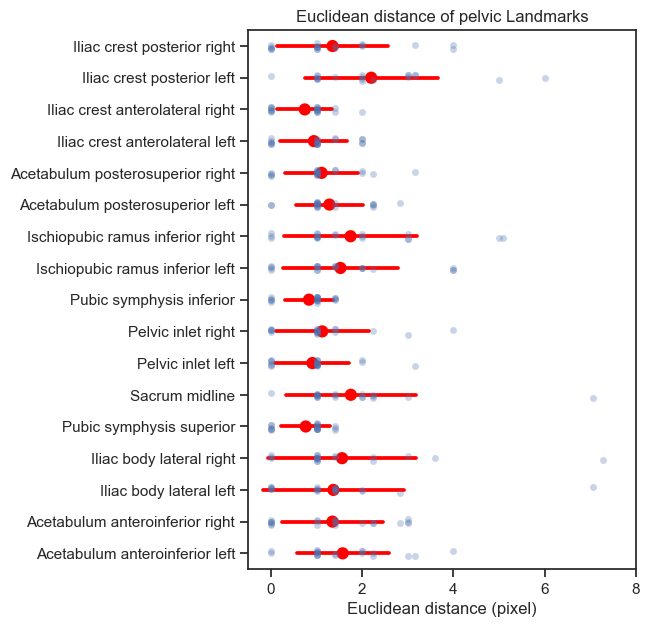

In [27]:
# selected_landmarks = ['iliac_spine_left', 'iliac_spine_right', 'iliopubic_eminence_left', 'iliopubic_eminence_right', 
#                         'inferior_pubic_ramus_left', 'inferior_pubic_ramus_right', 'pubic_arch', 'sciatic_notch_left', 'sciatic_notch_right', 'sacrum', 
#                         'trochanter_left', 'trochanter_right', 
#                         'sacrum_left', 'sacrum_right', 'inferior_iliac_spine_left', 'inferior_iliac_spine_right','acetabular_inferior_left', 'acetabular_inferior_right']
# df_landmarks = df_long[df_long['Variable'].isin(selected_landmarks)]

fig, ax = plt.subplots(figsize = (5, 7))
sns.set_theme(style="ticks", color_codes=True)
sns.stripplot(x="Value", y="Variable", data=df_long, alpha = 0.3, ax = ax)
sns.pointplot(
    data=df_long, x="Value", y="Variable",
    errorbar="sd", join=False, color="red",
    ax = ax
)

plt.xlabel("Euclidean distance (pixel)")
plt.ylabel("")
plt.xlim(-0.5, 8)
plt.title("Euclidean distance of pelvic Landmarks")
plt.savefig("out_fig/annotation_replicate.pdf", bbox_inches='tight')

## 2022-04-19 total 23 keypoints

In [5]:
img_path = "images/all_images_cp"
anno_path = "annotation_images/"
full_img_path = "../UKB_xray_image_info/jpg/816_288/"

### Load mapping files

In [6]:
dtypes = {"Image ID": object}
df_82 = pd.read_csv(anno_path + '816_288_Patient_EID_master_list_v2.csv', sep = '\t', dtype = dtypes)
df_93 = pd.read_csv(anno_path + '960_384_Patient_EID_master_list_v2.csv', sep = '\t', dtype = dtypes)
dict_82 = df_82[['File', "Image ID"]].set_index("File")['Image ID'].to_dict()
dict_93 = df_93[['File', "Image ID"]].set_index("File")['Image ID'].to_dict()

### Load annotations

In [7]:
anno_82 = json.load(open(os.path.join(anno_path, "tv_82_23kps.json")))
anno_93 = json.load(open(os.path.join(anno_path, "tv_93_23kps.json")))

### coco-annotations results convert to keypoints

#### For hip

In [8]:
anno_23kps = {}

for img in anno_82['images']:
    img_id = img['id']
    file_name = img['file_name']
    image_id = dict_82[file_name]
    for i in anno_82['annotations']:
        if i['image_id'] == img_id:
            kps = np.array(i['keypoints']).reshape(-1, 3)[:, :2]
            # according to central crop, adjust x,y
            kps[:, 0] = kps[:, 0] - 16
            kps[:, 1] = kps[:, 1] - 230
            kps = kps.tolist()
    anno_23kps[image_id  + '_82'] = kps

for img in anno_93['images']:
    img_id = img['id']
    file_name = img['file_name']
    image_id = dict_93[file_name]
    for i in anno_93['annotations']:
        if i['image_id'] == img_id:
            kps = np.array(i['keypoints']).reshape(-1, 3)[:, :2]
            # according to central crop, adjust x,y
            kps[:, 0] = kps[:, 0] - 64
            kps[:, 1] = kps[:, 1] - 302
            kps = kps.tolist()
    anno_23kps[image_id  + '_93'] = kps

In [9]:
len(anno_23kps.keys())

293

In [10]:
def show_kps(image_id):
    img_path = "images/all_images_cp"
    img = Image.open(os.path.join(img_path, image_id + ".jpg"))
    img = img.convert('RGB')
    draw = ImageDraw.Draw(img)
    # find corresponding kps
    kps = anno_23kps[image_id]
    for kp in kps:
        draw.ellipse((kp[0]-2, kp[1]-2, kp[0]+2, kp[1]+2), fill = 'red')
    return img

In [14]:
anno_23kps.keys()

dict_keys(['00093_82', '00132_82', '00157_82', '00223_82', '00398_82', '00579_82', '00631_82', '00755_82', '00793_82', '00847_82', '00860_82', '01061_82', '01325_82', '01460_82', '01560_82', '01588_82', '01643_82', '01684_82', '01751_82', '01900_82', '01910_82', '02049_82', '02170_82', '02191_82', '02192_82', '02257_82', '02358_82', '02406_82', '02533_82', '02541_82', '02754_82', '02957_82', '03108_82', '03128_82', '03162_82', '03460_82', '03736_82', '04183_82', '04255_82', '04401_82', '04777_82', '05022_82', '05065_82', '05074_82', '05273_82', '05435_82', '05445_82', '05572_82', '05646_82', '05658_82', '05678_82', '05687_82', '05747_82', '05862_82', '05980_82', '05998_82', '06295_82', '06474_82', '06731_82', '06742_82', '06755_82', '06914_82', '07281_82', '07398_82', '07769_82', '07887_82', '08217_82', '08516_82', '08582_82', '08768_82', '09322_82', '09349_82', '09689_82', '09799_82', '09869_82', '09948_82', '09968_82', '10161_82', '10377_82', '10673_82', '10724_82', '10770_82', '1098

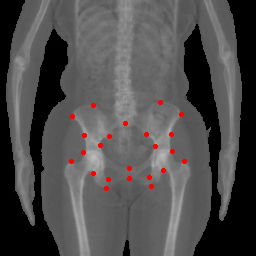

In [20]:
show_kps("00579_82")

In [101]:
with open(os.path.join(anno_path, "anno_23kps.json"), 'w') as f:
    json.dump(anno_23kps, f)

#### For head

In [58]:
!pwd

/Users/alexxu/Library/CloudStorage/Box-Box/Narasimhan_lab/hip_shape


In [64]:
dtypes = {"Image ID": object}
df_82 = pd.read_csv(anno_path + '816_288_Patient_EID_master_list_v2.csv', sep = '\t', dtype = dtypes)
df_93 = pd.read_csv(anno_path + '960_384_Patient_EID_master_list_v2.csv', sep = '\t', dtype = dtypes)
mapping_82 = df_82[['File', "Image ID"]].set_index("File")['Image ID'].to_dict()
mapping_93 = df_93[['File', "Image ID"]].set_index("File")['Image ID'].to_dict()

In [59]:
train_82 = json.load(open("../left_vs_right/annotation_data/person_keypoints_smaller_images_train.json"))
val_82 = json.load(open("../left_vs_right/annotation_data/person_keypoints_smaller_images_val.json"))
train_93 = json.load(open("../left_vs_right/annotation_data/person_keypoints_larger_images_train.json"))
val_93 = json.load(open("../left_vs_right/annotation_data/person_keypoints_larger_images_val.json"))

In [97]:
anno_path = "annotation_images/"

In [102]:
# combine train and val
tmp_dict_82 = {}
tmp_dict_93 = {}
tmp_dict_82['annotations'] = train_82['annotations'] + val_82['annotations']
tmp_dict_93['annotations'] = train_93['annotations'] + val_93['annotations']

# reformat
dict_82 = {}
dict_93 = {}

for i in range(len(tmp_dict_82['annotations'])):
    kps = np.array(tmp_dict_82['annotations'][i]['keypoints']).reshape(-1,3)[:5,:2]
    kps[:, 0] = kps[:, 0] - 16
    dict_82["{:05d}".format(tmp_dict_82['annotations'][i]['image_id']) + "_82"] = kps.tolist()

for i in range(len(tmp_dict_93['annotations'])):
    kps = np.array(tmp_dict_93['annotations'][i]['keypoints']).reshape(-1,3)[:5,:2]
    kps[:, 0] = kps[:, 0] - 64
    dict_93["{:05d}".format(tmp_dict_93['annotations'][i]['image_id']) + "_93"] = kps.tolist()

# combine
tv_all = {**dict_82, **dict_93}

# save
with open(os.path.join(anno_path, "tv_both_head.json"), 'w') as f:
    json.dump(tv_all, f)

In [121]:
img_path_82 = "../UKB_xray_image_info/jpg/816_288/"
img_path_93 = "../UKB_xray_image_info/jpg/960_384/"

def show_kps(image_id):
    if image_id[-2:] == "82":
        img_path = img_path_82
        iid = [k for k, v in mapping_82.items() if v == image_id[:-3]][0]
        kps = dict_82[image_id]
    else:
        img_path = img_path_93
        iid = [k for k, v in mapping_93.items() if v == image_id[:-3]][0]
        kps = dict_93[image_id]

    img = Image.open(os.path.join(img_path, iid))

    img = img.convert('RGB')
    draw = ImageDraw.Draw(img)
    
    # for kp in kps:
    #     draw.ellipse((kp[0]-2, kp[1]-2, kp[0]+2, kp[1]+2), fill = 'red')
    kp = kps[3]
    draw.ellipse((kp[0]-2 + 64, kp[1]-2, kp[0]+2 + 64, kp[1]+2), fill = 'red')
    kp = kps[4]
    draw.ellipse((kp[0]-2 + 64, kp[1]-2, kp[0]+2 + 64, kp[1]+2), fill = 'red')
    return img
    

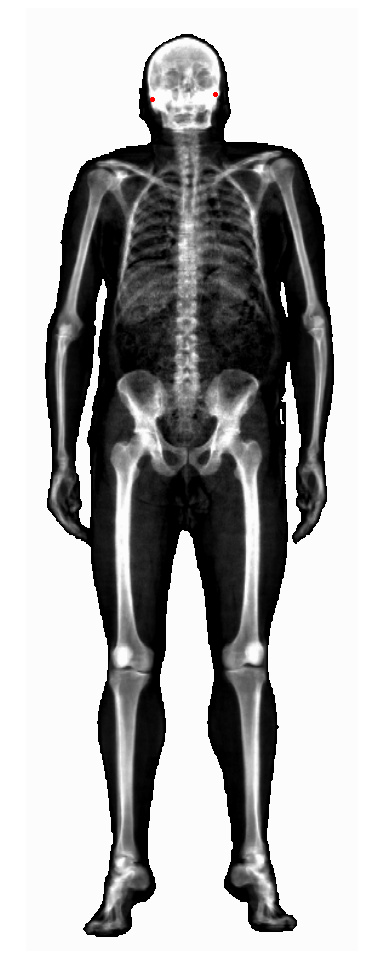

In [122]:
show_kps("04284_93")